# Análisis de Iris Dataset

El dataset que se analizará a continuación contiene registros de muestras tomadas a 3 tipos diferentes de plantas, con su respectiva etiqueta.
Dichas plantas son:   
<img src="imagenes/flores.png" />

## 1. Importe de librerías

In [6]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme()

## 2. Preparación inicial

Se cargan los datos en memoria y se inicializan los datasets de train y tests necesarios para probar el modelo.

In [78]:
# Función para graficar los modelos
def graficar(X, clasificador=None, salto=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, salto),
                         np.arange(y_min, y_max, salto))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    if clasificador != None:
        Z = clasificador.predict(np.array([xx.ravel(), yy.ravel()]).T)
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.3)

Etiquetas:
    0-Iris-setosa
    1-Iris-versicolor
    2-Iris-virginica
    Etiquetas del dataset [0 1 2] 

Conteo de etiquetas train y test:  [35 35 35] [15 15 15]


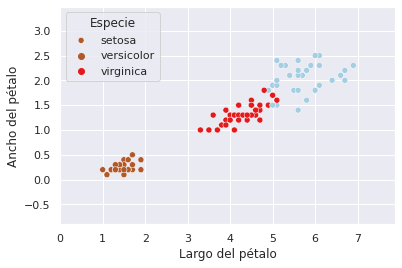

In [75]:
""" Carga de los datos de iris."""

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Etiquetas:\n\
    0-Iris-setosa\n\
    1-Iris-versicolor\n\
    2-Iris-virginica\n\
    Etiquetas del dataset', np.unique(y), '\n')

""" Separación en train y test.
    ---
    Hiperparámetros:
    Tamaño de test: 30%
    Semilla aleatoria: 1
    Estratificación activa"""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

""" La estratificación se puede verificar con np.bincount"""
print('Conteo de etiquetas train y test: ',np.bincount(y_train), np.bincount(y_test))
plt.xlabel("Largo del pétalo")
plt.ylabel("Ancho del pétalo")
min_max(X_train)
sns.scatterplot(x=X_train[: ,0], y=X_train[: ,1], hue = y_train, palette="Paired_r")
plt.legend(title='Especie', loc='upper left', labels=iris.target_names)
plt.show()

### 2.1 Normalización de los atributos

Para que los atributos sean comparables entre sí, es necesario transformar los valores a una escala estándar que permita comparar los atributos entre sí.
Para realizar esto, se usará el método StandarScaler, el cual retorna los valores con una media $ \mu $ igual a 0 y una varianza o desv. estándar $ \sigma $ igual a 1, de acuerdo a la siguiente fórmula:

$$
Z = \frac{x - u}{\sigma} \\
\mu = \frac {1}{N} \sum_{1}^{N} x_{i} \\
\sigma = \sqrt{\frac {1}{N}\sum_{1}^{N} (x_{i} - \mu)^2}
$$


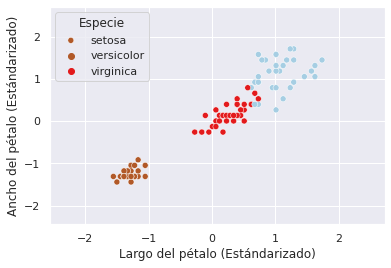

In [76]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
sns.scatterplot(x=X_train_std[: ,0], y=X_train_std[: ,1], hue=y_train, palette="Paired_r")
min_max(X_train_std)
plt.xlabel('Largo del pétalo (Estándarizado)')
plt.ylabel('Ancho del pétalo (Estándarizado)')
plt.legend(title='Especie', loc='upper left', labels=iris.target_names)
plt.show()

## Modelo SVM

In [70]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(X_train_std, y_train)
y_pred= svm.predict(X_test_std)
accuracy_score(y_pred=y_pred, y_true=y_test)

0.9777777777777777

In [83]:
X_std = sc.transform(X)
y_pred= svm.predict(X_std)
accuracy_score(y_pred=y_pred, y_true=y)
svm.score(X=X_std, y=y)

0.96

<AxesSubplot:>

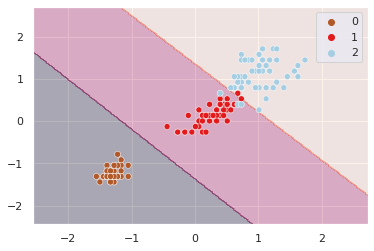

In [87]:
graficar(X_std, clasificador =svm)
sns.scatterplot(x=X_std[: ,0], y=X_std[: ,1], hue=y, palette="Paired_r")